<a href="https://colab.research.google.com/github/Zelechos/Generador-Css/blob/main/notebooks/Tranformers/Mecanismos_de_Atencion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformers - Mecanismos de Atención

# *Hard attention*
*hard attention mechanism* : Este mecanismo de atención no produce nada nuevo, produce a la salida lo mismo que recibe a la entrada.

Crearemos un conjunto de vectores como inputs esto nos tiene que dar como resultado otro conjunto de vectores en este caso los outputs que no variaran.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

Creamos nuestro tensor que nos servira como input dando a entender que estos valores son los datos que normalmente ntroducimos al Modelo.

In [5]:
my_data = torch.tensor([[3, 0],[0, 3], [-1, -1]])
print(my_data)

tensor([[ 3,  0],
        [ 0,  3],
        [-1, -1]])


Ploteamos nuestro tensor.

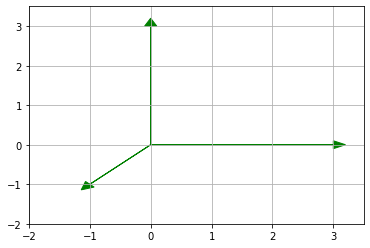

In [6]:
def plot_vectors(X, y=None):
    ax = plt.axes()
    plt.grid()

    for x in X:
        ax.arrow(0, 0, x[0], x[1], head_width=0.2, head_length=0.2, color="green")

    if y is not None:
        for _y in y:
            if _y.sum() != 0:
                ax.arrow(0, 0, _y[0], _y[1], head_width=0.1, head_length=0.1, color='red')
    plt.xlim(-2,3.5)
    plt.ylim(-2,3.5)
    plt.show()

plot_vectors(my_data)

Creamos nuestro vector atencion al primer vector. 

In [8]:
Vector_atencion = torch.tensor([1, 0, 0])
print(Vector_atencion)

tensor([1, 0, 0])


Para aplicar nuestro mecanismo de atención, simplemente multiplicamos nuestro conjunto de vectores por el vector de atención.

In [12]:
# todos los vectores en la salida son 0, excepto al que hemos prestado atención
# Aplicamos nuestro mecanismo de atencion
vector_con_atencion = Vector_atencion.unsqueeze(1) * my_data
print(vector_con_atencion)

tensor([[3, 0],
        [0, 0],
        [0, 0]])


#### Como podemos ver se marca de rojo al vector que le hemos prestado atencion y dado que solo hemos prestado atención únicamente a un elemento del conjunto, deshechamos el resto.

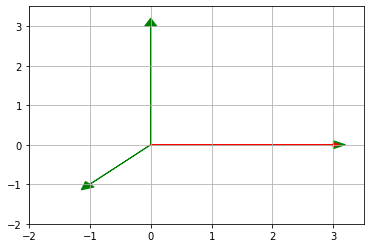

In [13]:
plot_vectors(my_data, vector_con_atencion)

Podemos aplicar este mecanismo en una sola operación a todos los vectores generando una matriz de atención. En el caso de *hard attention*, esta matriz es la identidad.

In [16]:
# Creamos nuestro matriz de Atencion  
print("------- Matriz de Atencion o Matriz Identidad -----------")
Matriz_Atencion = torch.eye(3)
print(Matriz_Atencion)

# Creamos una matriz de inputs
print("------- Matriz de Inputs -----------")
Matriz_Inputs = torch.tensor([[3, 0],[0,3], [-1.5, -1.5]])
print(Matriz_Inputs)

------- Matriz de Atencion o Matriz Identidad -----------
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])
------- Matriz de Inputs -----------
tensor([[ 3.0000,  0.0000],
        [ 0.0000,  3.0000],
        [-1.5000, -1.5000]])


Multiplicando nuestra matriz de atención por la matriz que contiene todos los vectores de entrada, obtenemos los vectores de salida. En este caso, repetimos, obtendremos exactamente el mismo conjunto de vectores ya que cada vector a la salida atiene únicamente a un vector a la entrada, aquel que está en su misma posición. 

In [17]:
Matriz_Output = Matriz_Atencion @ Matriz_Inputs

print("------- Matriz de Ouputs -----------")
print(Matriz_Output)

------- Matriz de Ouputs -----------
tensor([[ 3.0000,  0.0000],
        [ 0.0000,  3.0000],
        [-1.5000, -1.5000]])


In [ ]:
# Ploteamos nuestras matrices
def plot(X, Y):
    fig = plt.figure(figsize=(15,4))
    for i, (x, y) in enumerate(zip(X, Y)):
      ax = plt.subplot(1, 3, i + 1)
      for x in X:
          ax.arrow(0, 0, x[0], x[1], head_width=0.3, color="green", head_length=0.3)
      ax.arrow(0, 0, y[0], y[1], head_width=0.3, head_length=0.3, color='red')
      ax.set_xlim(-2,4.5)
      ax.set_ylim(-2,4.5)
      ax.grid(True)
      ax.set_title(f"Atiende a {X[i].tolist()}")
    plt.tight_layout()
    plt.show()

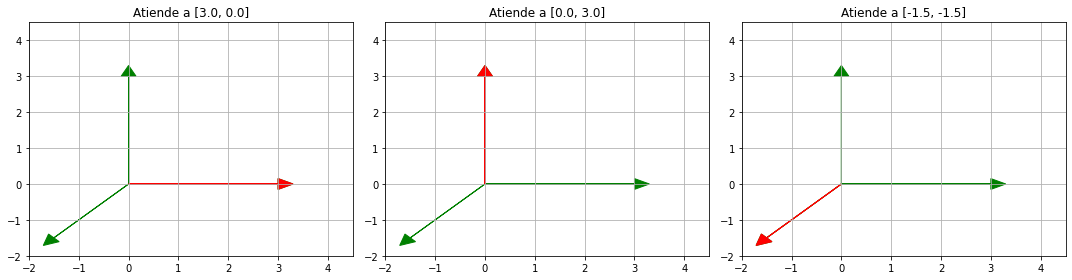

In [ ]:
plot(Matriz_Inputs,Y)

## *Soft attention*

En *Soft Attention* vamos a permitir prestar atención a todos los vectores a la entrada. Así pues, cada vector generado será una combinación de los inputs. En el siguiente ejemplo, cada vector generado presta un 90% de atención al vector en la entrada en su misma posición y un 5% al resto.

In [22]:
# soft attention (cada fila suma 1)
print("------- Matriz de Atencion -----------")
Matriz_Atencion = torch.ones((3, 3))*0.05
Matriz_Atencion.fill_diagonal_(0.90)

print(Matriz_Atencion)

------- Matriz de Atencion -----------
tensor([[0.9000, 0.0500, 0.0500],
        [0.0500, 0.9000, 0.0500],
        [0.0500, 0.0500, 0.9000]])


In [24]:
Matriz_Outputs = Matriz_Atencion @ Matriz_Inputs
print("------- Matriz de Inputs -----------")
print(Matriz_Inputs)
print("------- Matriz de Outputs -----------")
print(Matriz_Outputs)

------- Matriz de Inputs -----------
tensor([[ 3.0000,  0.0000],
        [ 0.0000,  3.0000],
        [-1.5000, -1.5000]])
------- Matriz de Outputs -----------
tensor([[ 2.6250,  0.0750],
        [ 0.0750,  2.6250],
        [-1.2000, -1.2000]])


In [25]:
def plot1(X, Y):
    fig = plt.figure(figsize=(15,4))
    for i, (x, y) in enumerate(zip(X, Y)):
      ax = plt.subplot(1, 3, i + 1)
      for x in X:
          ax.arrow(0, 0, x[0], x[1], color="blue", head_width=0.2, head_length=0.2)
      Z = Matriz_Atencion[i].unsqueeze(1) * X
      for z in Z:
        ax.arrow(0, 0, z[0], z[1], head_width=0.2, head_length=0.2, color='green')
      ax.arrow(0, 0, y[0], y[1], head_width=0.2, head_length=0.2, color='red')
      ax.set_xlim(-2.5,4.5)
      ax.set_ylim(-2.5,4.5)
      ax.grid(True)
      ax.set_title(f"Atiende a {X[i].tolist()}")
    plt.tight_layout()
    plt.show()

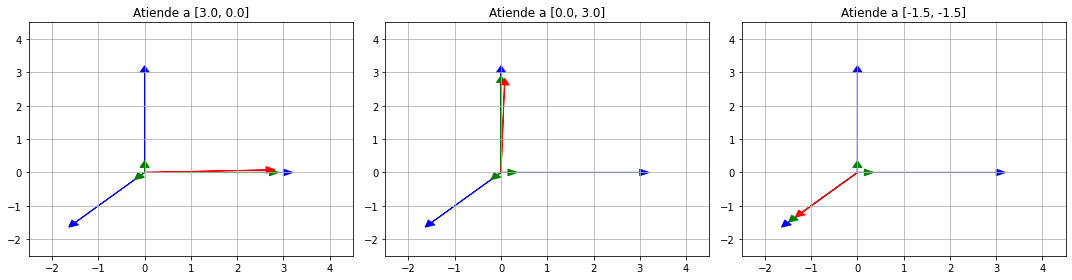

In [26]:
plot1(Matriz_Inputs, Matriz_Outputs)

Como se puede apreciar se muestra el vector al cual le hemos prestado mas atencion de color rojo*(una atencion del 90%)* entendiendo que tambien tiene una leve desviacion por la atencion que hemos dado a los demas vectores*(una atencion del 5% a cada vector)* esto nos da a entender que entre mayor atencion demos a un determinado vector mas importante este sera a la hora del entrenamiento.

Ahora vamos a jugar con esto dada la anterior afirmacion de que "*entre mayor atencion demos a un determinado vector mas importante este sera a la hora del entrenamiento*" a continuacion le daremos la misma atencion a cada vector para ver que resultados nos genera.

*La suma de los valores del Vector tiene que ser igual a 1 , por eso si el vector tiene una longitud de 3 cada valor sera 0.3333* <br>(Prestando asi igual atención a todos los vectores).

In [28]:
Matriz_Atencion = torch.ones((3, 3))*(1./3.)

print("------- Matriz de Atencion -----------")
print(Matriz_Atencion)

------- Matriz de Atencion -----------
tensor([[0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333],
        [0.3333, 0.3333, 0.3333]])


In [29]:
Matriz_Outputs2 = Matriz_Atencion @ Matriz_Inputs
print("------- Matriz de Inputs -----------")
print(Matriz_Inputs)
print("------- Matriz de Outputs -----------")
print(Matriz_Outputs2)

------- Matriz de Inputs -----------
tensor([[ 3.0000,  0.0000],
        [ 0.0000,  3.0000],
        [-1.5000, -1.5000]])
------- Matriz de Outputs -----------
tensor([[0.5000, 0.5000],
        [0.5000, 0.5000],
        [0.5000, 0.5000]])


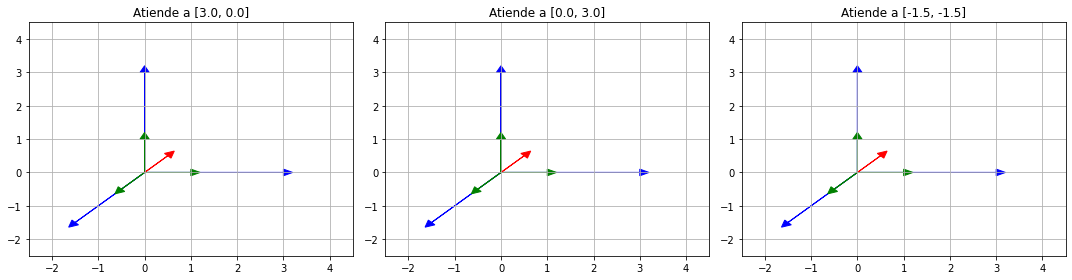

In [30]:
plot1(Matriz_Inputs, Matriz_Outputs2)

En este caso, todos los vectores generados son iguales. La pregunta ahora es, ¿cuánta atención debe un vector prestar al resto? La respuesta es sencilla...Self attention !

### *Self attention*

En este último mecanismo de atención que veremos, cada vector es responsable de decidir por si mismo cuánta atención prestar al resto. Para ello calcularemos la similitud entre vectores. Cuanto más parecidos sean dos vectores, más atención habrá entre ellos y viceversa. En una tarea de traducción de texto, por ejemplo, a la hora de generar una palabra un mecanismo de *self attention* permitiría prestar más atención a aquellas palabras más relacionadas a la entrada, y no desperdiciar computación con aquellas que no tienen importancia. Esta similitud la calculamos multiplicando los vectores por si mismos y aplicando una función softmax.

In [34]:
# self attention -> similitud de cada vector con el resto

#Creamos una la matriz de entrada
Matriz_Input = torch.tensor([[1, 0], [0, 1], [-0.5, -0.5]])
print("------- Matriz de Inputs -----------")
print(Matriz_Input)

# Verificando la similitud y aplicamos softmax
Matriz_Atencion = torch.softmax(Matriz_Input @ Matriz_Input.T, 1)
print("------- Matriz de Atencion -----------")
print(Matriz_Atencion)

------- Matriz de Inputs -----------
tensor([[ 1.0000,  0.0000],
        [ 0.0000,  1.0000],
        [-0.5000, -0.5000]])
------- Matriz de Atencion -----------
tensor([[0.6285, 0.2312, 0.1402],
        [0.2312, 0.6285, 0.1402],
        [0.2119, 0.2119, 0.5761]])


In [36]:
# Aplicamos nuestro mecanismo Self Attention Multiplicando nuestra Matriz de Atencion y Nuestros Inputs
Matriz_outputs3 = Matriz_Atencion @ Matriz_Input
print("------- Matriz de Outputs -----------")
print(Matriz_outputs3)

------- Matriz de Outputs -----------
tensor([[ 0.5584,  0.1611],
        [ 0.1611,  0.5584],
        [-0.0761, -0.0761]])


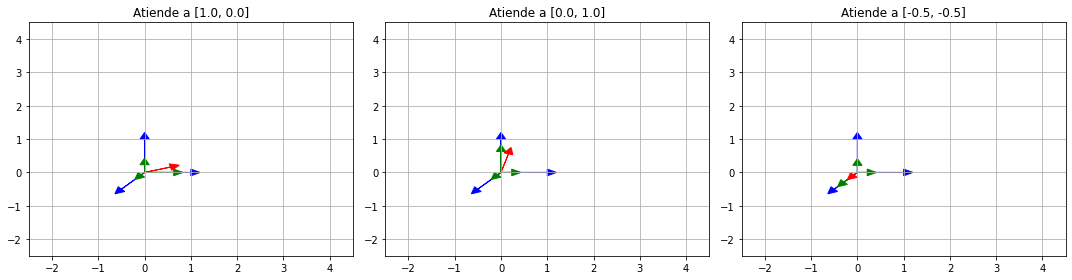

In [38]:
plot1(Matriz_Input, Matriz_outputs3)

Ejercicio de Comprension : Vamos a aplicar *self attetion* a un tensor mas grande y ver los outputs verificando cuanta atencion presta a los deferentes valores.

Primero Creamos Nuestra Matriz de Inputs 3 x 3

In [40]:
Matriz_Inputs_IMG_Computadoras = torch.tensor([
                                               [0.1, 0.1, 0.8],
                                               [0.2, 0.4, 0.4],
                                               [0.0, 0.0, 1],
                                               ]);
print("------- Matriz de Inputs -----------")
print(Matriz_Inputs_IMG_Computadoras)                                        

------- Matriz de Inputs -----------
tensor([[0.1000, 0.1000, 0.8000],
        [0.2000, 0.4000, 0.4000],
        [0.0000, 0.0000, 1.0000]])


Segundo Aplicamos Softmax y La Multiplicacion de nuestra Matriz de Inputs con su Transpuesta para Calcular la Similitud entre Nuestros Vectores.

In [41]:
Matriz_Atencion = torch.softmax(Matriz_Inputs_IMG_Computadoras @ Matriz_Inputs_IMG_Computadoras.T, 1)
print("------- Matriz de Atencion -----------")
print(Matriz_Atencion)

------- Matriz de Atencion -----------
tensor([[0.3441, 0.2601, 0.3958],
        [0.3333, 0.3267, 0.3400],
        [0.3458, 0.2318, 0.4224]])


Tercero Aplicamos el mecanismo de atencion multiplicando nuestra Matriz de Atencion con Nuestra Matriz de Inputs.

In [42]:
Matriz_outputs4 = Matriz_Atencion @ Matriz_Inputs_IMG_Computadoras
print("------- Matriz de Outputs -----------")
print(Matriz_outputs4)

------- Matriz de Outputs -----------
tensor([[0.0864, 0.1384, 0.7751],
        [0.0987, 0.1640, 0.7373],
        [0.0809, 0.1273, 0.7918]])
